In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\linear regression\\delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In [3]:
data.shape

(21, 2)

In [4]:
data.info

<bound method DataFrame.info of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [5]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.rename({'Delivery Time':'D_Time','Sorting Time':'S_Time'},inplace=True,axis=1)

In [10]:
data.head()

,D_Time,S_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Text(0.5, 0.98, 'Delivery time')

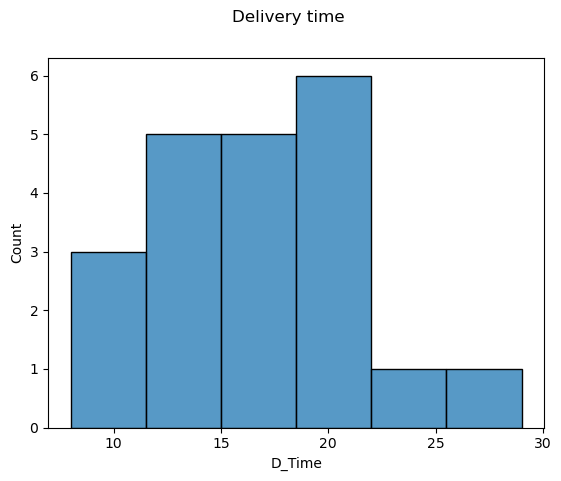

In [11]:
sns.histplot(data['D_Time'],)
plt.suptitle('Delivery time')

In [12]:
# positive skew

Text(0.5, 0.98, 'sorting time')

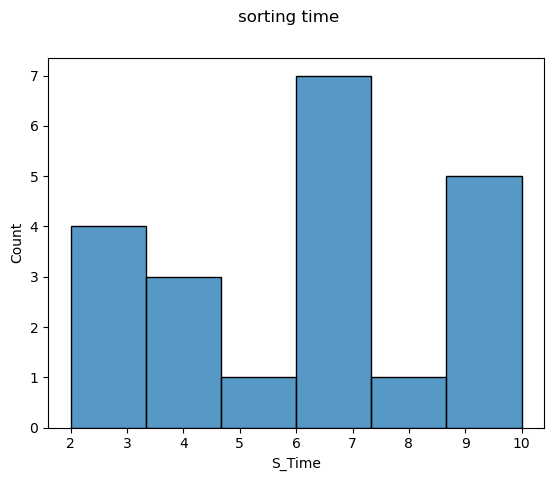

In [13]:
sns.histplot(data['S_Time'])
plt.suptitle('sorting time')

In [59]:
#positive skew

0.047115474210530174

# correlation analysis

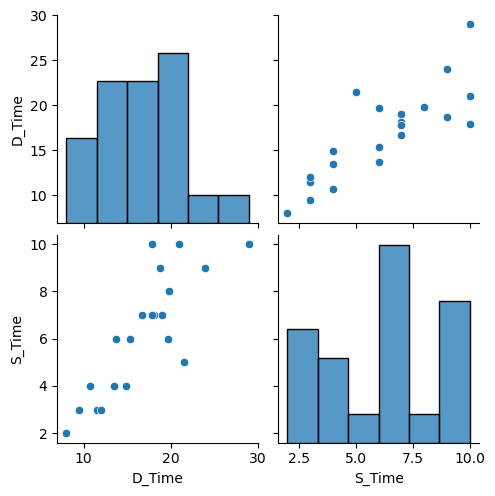

In [58]:
sns.pairplot(data)

In [57]:
data.corr()

,D_Time,S_Time
D_Time,1.000000,0.825997
S_Time,0.825997,1.000000


# Transformation

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [27]:
data1=norm_func(data.S_Time)
data1.head()

0    1.000
1    0.250
2    0.500
3    0.875
4    1.000
Name: S_Time, dtype: float64

In [28]:
data2=pd.DataFrame(data1,columns=['S_Time'])
data2['D_Time']=data.D_Time

In [29]:
data2.head()

,S_Time,D_Time
0,1.000,21.00
1,0.250,13.50
2,0.500,19.75
3,0.875,24.00
4,1.000,29.00


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='D_Time', ylabel='Density'>

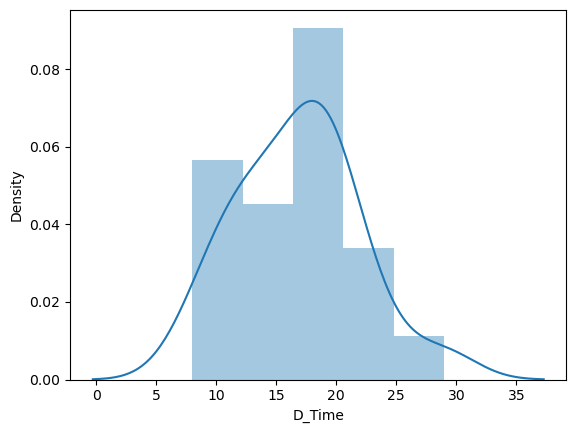

In [30]:
sns.distplot(data2['D_Time'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='D_Time', ylabel='Density'>

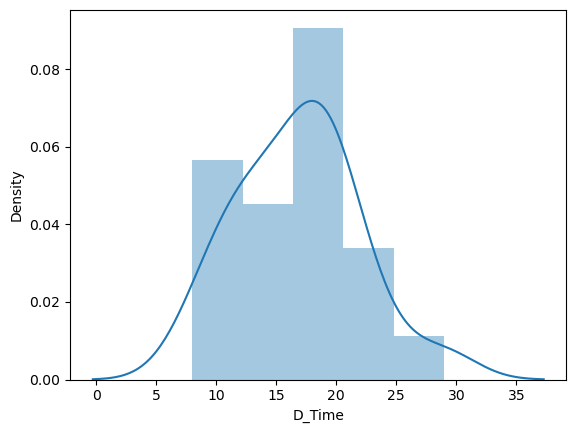

In [31]:
sns.distplot(data2['D_Time'])

<AxesSubplot:>

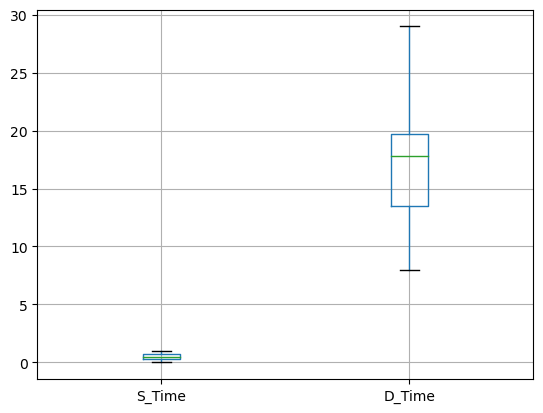

In [32]:
data2.boxplot()

# there are no outliers from above plot

In [33]:
data2.describe()

,S_Time,D_Time
count,21.000000,21.000000
mean,0.523810,16.790952
std,0.317753,5.074901
min,0.000000,8.000000
25%,0.250000,13.500000
50%,0.500000,17.830000
75%,0.750000,19.750000
max,1.000000,29.000000


<AxesSubplot:xlabel='S_Time', ylabel='D_Time'>

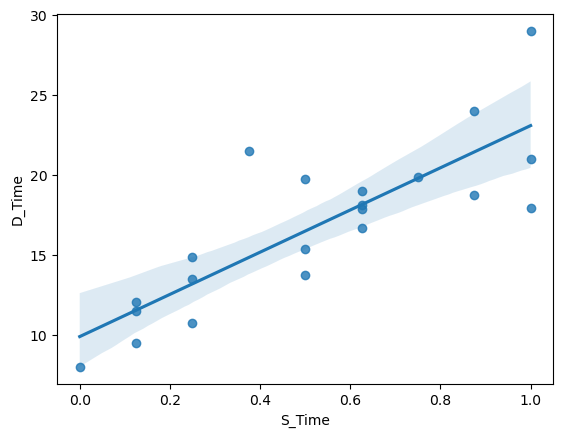

In [34]:
sns.regplot(x='S_Time',y='D_Time',data=data2)

# Correlation analysis

In [36]:
data2.corr()

,S_Time,D_Time
S_Time,1.000000,0.825997
D_Time,0.825997,1.000000


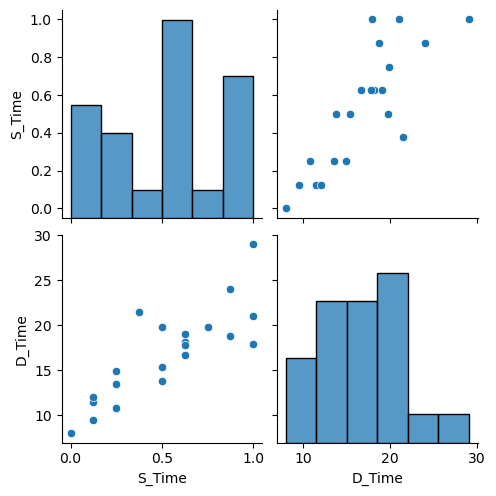

In [38]:
sns.pairplot(data2)

# model building

In [40]:
import statsmodels.formula.api as smf

In [41]:
model=smf.ols('D_Time~S_Time',data=data2).fit()

In [42]:
model.params

Intercept     9.880774
S_Time       13.192159
dtype: float64

# creating new data frame to store predicted and residual values

In [43]:
data2['pred_values']=model.fittedvalues

In [44]:
data2['error']=model.resid

In [45]:
data2['error_sqrd']=(model.resid)**2

In [46]:
data2.head()

,S_Time,D_Time,pred_values,error,error_sqrd
0,1.000,21.00,23.072933,-2.072933,4.297051
1,0.250,13.50,13.178814,0.321186,0.103161
2,0.500,19.75,16.476853,3.273147,10.713489
3,0.875,24.00,21.423913,2.576087,6.636224
4,1.000,29.00,23.072933,5.927067,35.130124


In [47]:
model.rsquared

0.6822714748417231

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 D_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        01:02:08   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8808      1.257      7.859      0.000       7.249      12.512
S_Time        13.1922      2.065      6.387      0.000       8.869      17.515
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# since p value is < 0.05, x significant to y

<AxesSubplot:xlabel='S_Time', ylabel='D_Time'>

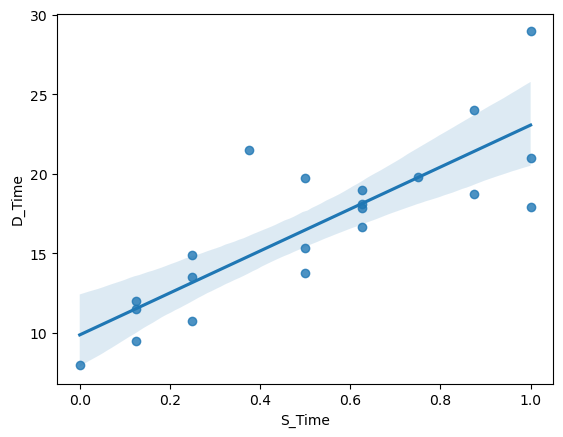

In [53]:
sns.regplot(x=data2.S_Time,y=data2.D_Time,data=data2)

# Residual analysis

In [49]:
import statsmodels.api as sm

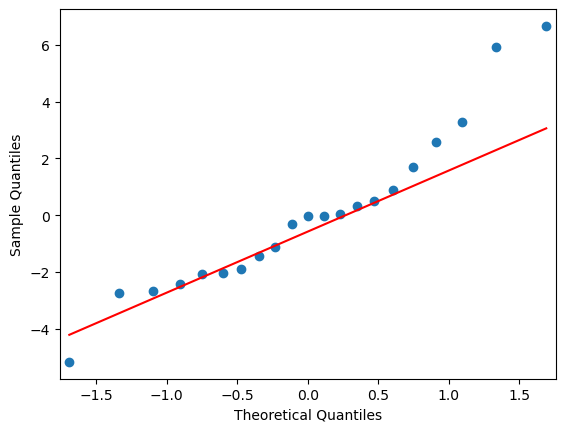

In [50]:
qqplot=sm.qqplot(model.resid,line='q')

In [51]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

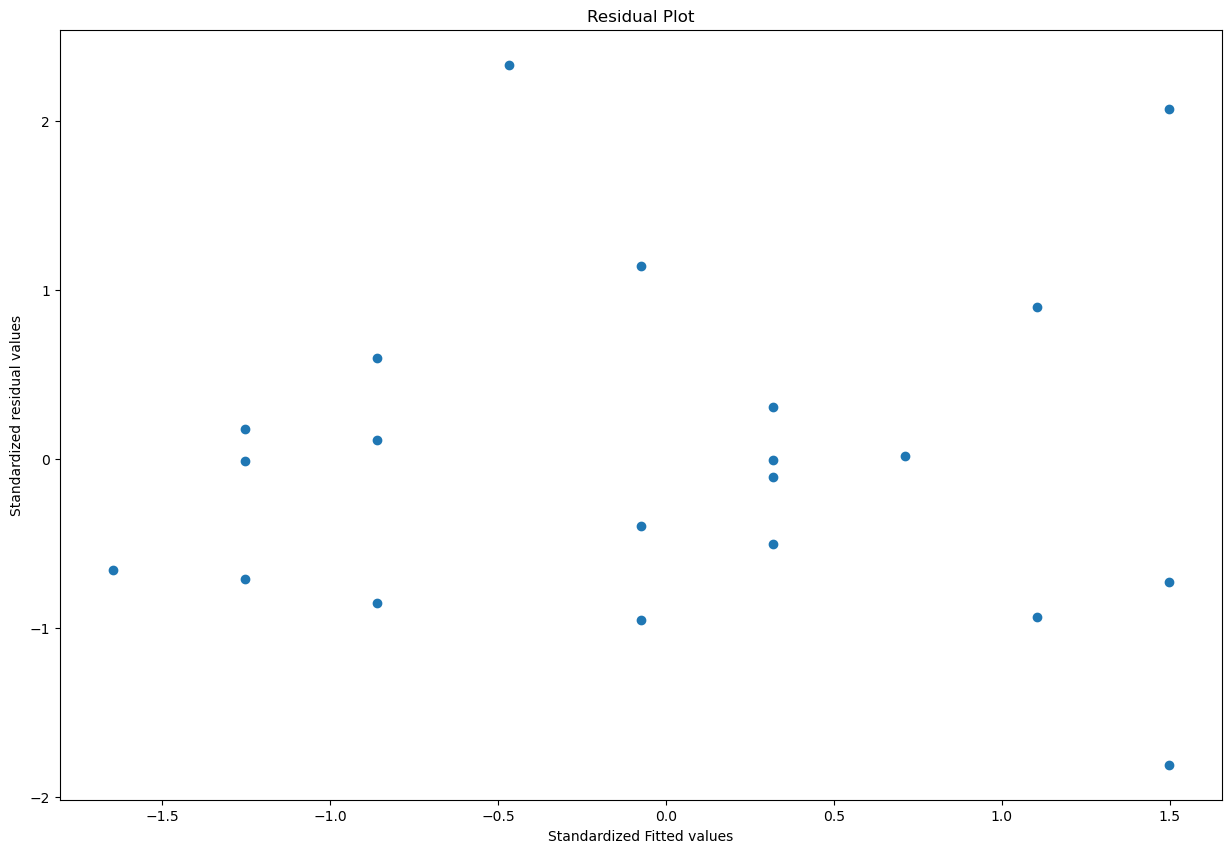

In [52]:
plt.figure(figsize=(15,10))
scatterplot=plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# predicting the new data

In [55]:
x_ind=(10,20,30,40,10,55,89,98)
df_new=pd.DataFrame(x_ind,columns=['S_Time'])
df_new

,S_Time
0,10
1,20
2,30
3,40
4,10
5,55
6,89
7,98


In [56]:
model.predict(df_new)

0     141.802366
1     273.723957
2     405.645549
3     537.567141
4     141.802366
5     735.449528
6    1183.982940
7    1302.712373
dtype: float64